# Problem 1: Classification

You are required to implement a single layer neural network (*perceptron*) and to evaluate its effectiveness on a classification problem. You will deal with two classes, C1 and C2, where each object is represented by two *features* X1 and X2.

## Exercise 1.1

In this part, you will play the role of the *oracle*. The requirements for generating the data points are the following.

+ you have N = 250 points per class;
+ the probability distribution for X1 for each class is following::
    1. class 1, a normal distribution with mean 0.5 and standard deviation 1.5
    2. class 2, a normal distribution with mean 5.4 and standard deviation 0.5
+ the probability distribution for X2 for each class is the following:
    1. class 1, a Poisson distribution with lambda 1.5
    2. class 2, an exponential distribution with *scale* parameter equal to 2
+ for class 1, you will use the label +1, for class 2 the label -1.
+ before generating the data, set the random seed equal to the last four digits of your student id (i.e., if your student id is 2004312, the seed will be 4312)

In [29]:
import numpy as np

# set seed
np.random.seed(4312)

# number of samples
N = 250

# class 1
X1_1 = np.random.normal(loc=0.5, scale=1.5, size=N)
X1_2 = np.random.poisson(lam=1.5, size=N)

# class 2
X2_1 = np.random.normal(loc=5.4, scale=0.5, size=N)
X2_2 = np.random.exponential(scale=2, size=N)

# labels
Y1 = np.ones(N)
Y2 = - np.ones(N)

## Exercise 1.2 

Draw a scatter plot to show the distribution of points of the two classes.

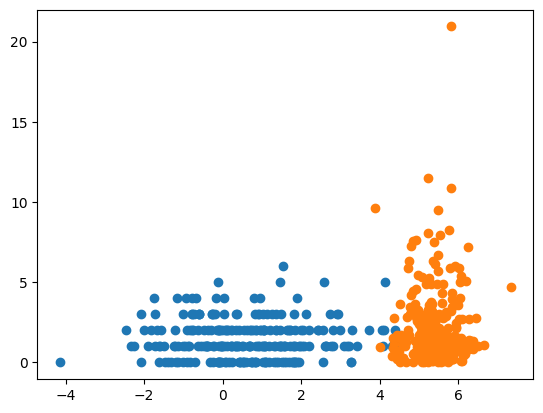

In [30]:
import matplotlib.pyplot as plt

# first class
plt.scatter(X1_1, X1_2)

# second class
plt.scatter(X2_1, X2_2)

## Exercise 1.3

Create the matrix of points X (each row is an object, each column a feature). Do not forget to add the bias X0.
Create the output vector y.


In [31]:
# bias
X_0 = np.ones(2 * N)

# feature X_1
X_1 = np.concatenate((X1_1, X2_1))

# feature X_2
X_2 = np.concatenate((X1_2, X2_2))

# dataset X
X = np.stack((X_0, X_1, X_2), axis=1)

# labels
y = np.concatenate((Y1, Y2))

## Exercise 1.4

Train a *perceptron* using a **mini-batch stochastic gradient descent approach** with the following requirements:
+ initialize the vector of parameters *w* with a normal distribution with mean 0 and standard deviation
+ Set the parameter *eta* equal to 1e-4
+ Use a mini-batch of size 20
+ Set the maximum number of epochs equal to 500
+ Save in a vector named [errors_epoch] the number of misclassified objects for each epoch.

In [32]:
# weight vector
w = np.random.normal(loc=0, size=X.shape[1])

# learning rate
eta = 1e-4

# batch
batch_size = 20

# epochs
max_epochs = 500
current_epoch = 0

# errors
errors_epoch = np.zeros(max_epochs)

# training
while current_epoch < max_epochs:

    # save errors per epoch
    errors_epoch[current_epoch] = np.sum( y - np.sign(np.dot(X, w)) < 0 )

    # shuffle dataset
    random_permutation = np.random.permutation(range(y.size))
    X = X[random_permutation, :]
    y = y[random_permutation]

    for i in range(0, y.size, batch_size):

        # get dataset portion
        x_batch = X[i : (i + batch_size), :]
        y_batch = y[i : (i + batch_size)]

        # gradient descend learning rule
        w += 2 * eta * np.dot(np.transpose(x_batch), y_batch - np.dot(x_batch, w)) / batch_size


    current_epoch += 1

## Exercise 1.5

Draw two plots: the first plot shows the data points and the separating hyperplane; the second plot, the trend of the number of errors per epoch.


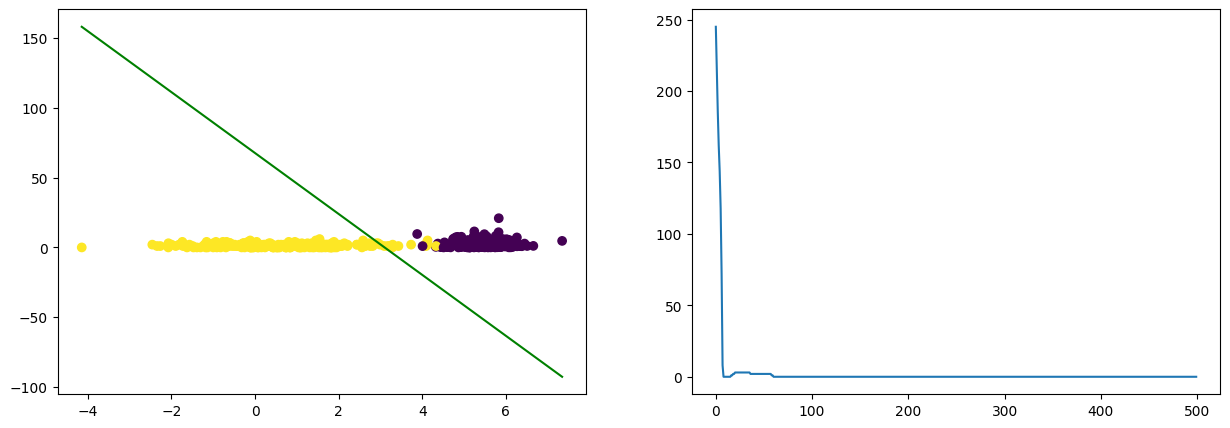

In [33]:
# subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# scatters the point
axs[0].scatter(X[:, 1], X[:, 2], c=y)

# plots the line
axs[0].plot([np.min(X[:, 1]), np.max(X[:, 1])],
            [ - np.min(X[:, 1]) * w[1]/w[2] - w[0]/w[2], - np.max(X[:, 1]) * w[1]/w[2] - w[0]/w[2]],
            color='green')

# plots the errors
axs[1].plot(range(errors_epoch.size), errors_epoch)